In [3]:
using ConstraintPropagation, ValidatedNumerics

In [4]:
include("draw_boxes.jl")

draw_boxes (generic function with 4 methods)

In [5]:
S1 = @separator x^2 + y^2 <= 1

Separator:
  - variables: [:x,:y]

In [9]:
function draw(inner)
    draw_boxes(inner, "green", 0.5)
    axis("image")
end

function draw(inner, boundary)
    draw_boxes(inner, "green", 0.5)
    draw_boxes(boundary, "gray", 0.5)
    axis("image")
end

draw (generic function with 3 methods)

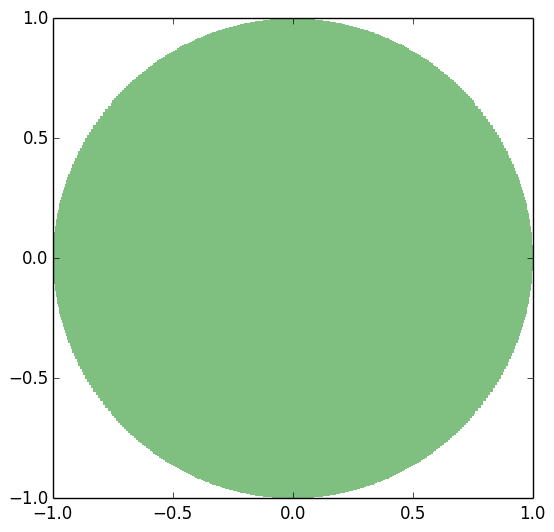

(-0.9999084430742895,0.9999084430742898,-0.9999694819561993,0.9999694819561993)

In [8]:
X = IntervalBox(-100..100, -100..100)
inner, boundary = set_inversion(S1, X, ldexp(1., -6))
draw(inner)

In [6]:
inner

0-element Array{ValidatedNumerics.IntervalBox{2,Float64},1}

In [11]:
area(X::IntervalBox) = prod(map(diam, X))

function area(inner, boundary)
    lower = sum(map(area, inner))
    upper = lower + sum(map(area, boundary)) 
    return hull(lower, upper)
end

area (generic function with 2 methods)

Calculate area of inner and boundary pavings:

In [12]:
X = IntervalBox(-2..2, -2..2)

for i in 2:10

    @time inner, boundary = set_inversion(S1, X, ldexp(1., -i))
    @show i, area(inner, boundary), length(inner), length(boundary)
end

  0.011733 seconds (100.93 k allocations: 2.994 MB)
(i,area(inner,boundary),length(inner),length(boundary)) = (2,[2.92837, 3.31564],32,36)
  0.021562 seconds (199.37 k allocations: 5.916 MB)
(i,area(inner,boundary),length(inner),length(boundary)) = (3,[3.03985, 3.2335],68,72)
  0.055131 seconds (395.38 k allocations: 11.731 MB, 18.26% gc time)
(i,area(inner,boundary),length(inner),length(boundary)) = (4,[3.09195, 3.18877],140,144)
  0.093817 seconds (786.51 k allocations: 23.331 MB, 13.97% gc time)
(i,area(inner,boundary),length(inner),length(boundary)) = (5,[3.11708, 3.16549],284,288)
  0.202812 seconds (1.57 M allocations: 46.505 MB, 15.20% gc time)
(i,area(inner,boundary),length(inner),length(boundary)) = (6,[3.12941, 3.15362],572,576)
  0.377635 seconds (3.13 M allocations: 92.826 MB, 13.51% gc time)
(i,area(inner,boundary),length(inner),length(boundary)) = (7,[3.13552, 3.14763],1148,1152)
  0.753887 seconds (6.25 M allocations: 185.441 MB, 15.08% gc time)
(i,area(inner,boundary),l

LoadError: LoadError: InterruptException:
while loading In[12], in expression starting on line 3

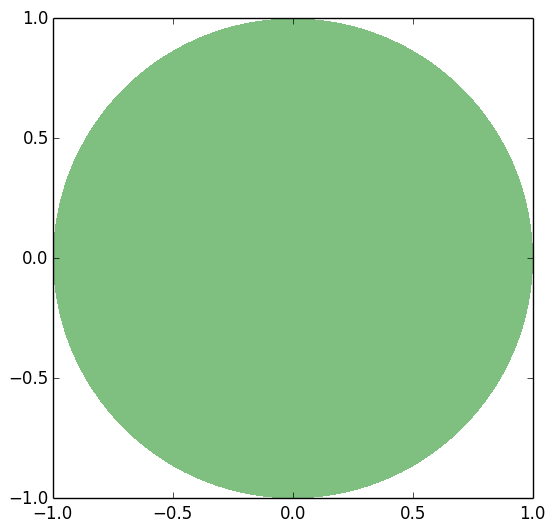

(-0.999998569487502,0.9999985694875023,-0.9999995231627279,0.9999995231627279)

In [13]:
draw(inner)

In [19]:
length(inner)

8628

  0.660707 seconds (4.91 M allocations: 146.569 MB, 16.20% gc time)


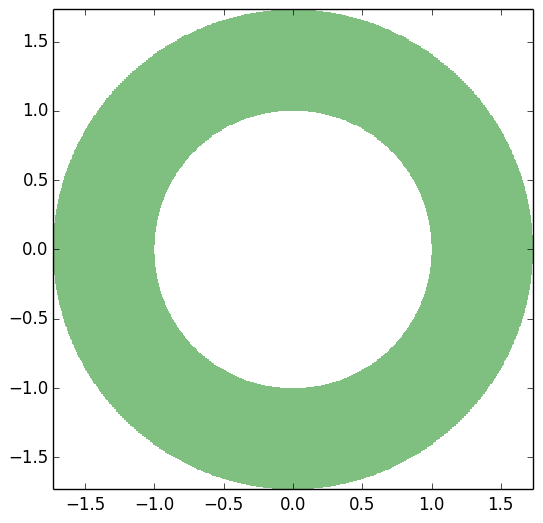

(-1.7320111636183058,1.7320111636183055,-1.731997948766467,1.731997948766467)

In [17]:
X = IntervalBox(-100..100, -100..100)
S2 = @separator 1 <= x^2 + y^2 <= 3
@time inner, boundary = set_inversion(S2, X, ldexp(1., -6))
draw(inner)

In [18]:
length(inner)

1344

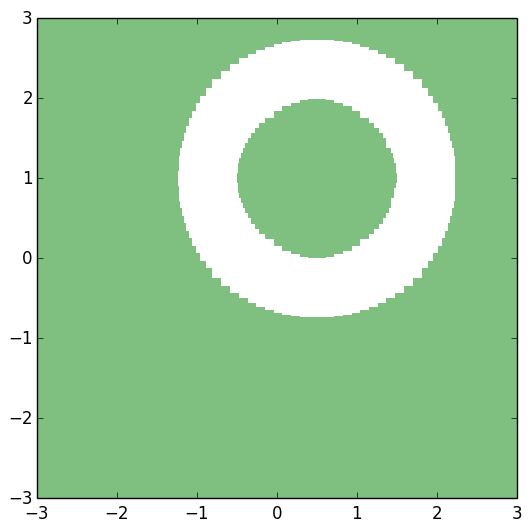

(-3.0,3.0,-3.0,3.0)

In [22]:
S3 =  @separator 1 <= (x-0.5)^2 + (y-1)^2 <= 3
S3c = !S3  # complement

Y = IntervalBox(-3..3, -3..3)
inner, boundary = set_inversion(S3c, Y, ldexp(1., -3))
draw(inner)


In [28]:
setprecision(Interval, Float64)
X = IntervalBox(-3..3, -3..4)
S2 = @separator 1 <= x^2 + y^2 <= 3
S4 = @separator 1 <= (x-0.5)^2 + (y-1)^2 <= 3
S24 = S2 ∪ S4

inner, boundary = set_inversion(S24, X, ldexp(1., -1))
#draw(inner, boundary)
draw(inner)
axis("image")


LoadError: LoadError: InterruptException:
while loading In[28], in expression starting on line 7

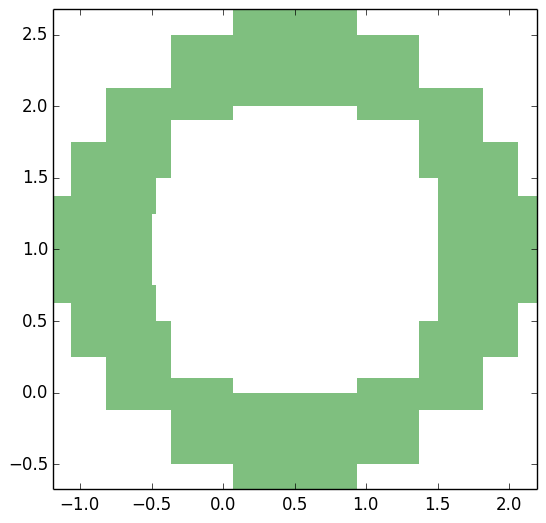

(-1.1909686573085851,2.190968657308585,-0.677050983124842,2.677050983124842)

In [30]:
S4 = @separator 1 <= (x-0.5)^2 + (y-1)^2 <= 3
inner, boundary = set_inversion(S4, X, ldexp(1., -1))
draw(inner)
axis("image")

In [ ]:
setprecision(Interval, Float64)
X = IntervalBox(-3..3, -3..4)
S2 = @separator 1 <= x^2 + y^2 <= 3
S4 = @separator 1 <= (x-0.5)^2 + (y-1)^2 <= 3
S24 = S2 ∩ S4
inner, boundary = set_inversion(S24, X, ldexp(1., -2))
draw(inner)
axis("image")

In [25]:
S24 = S2 ∩ S4

inner, boundary = set_inversion(S24, X, ldexp(1., -4))
draw(inner)


LoadError: LoadError: MethodError: `decompose` has no method matching decompose(::ValidatedNumerics.Interval{BigFloat})
while loading In[25], in expression starting on line 3

In [26]:
S5a = @separator 1 >= x+y >= -1
S5b = @separator x-y >= 1

S5 = S5a ∩ S5b

inner, boundary = set_inversion(S5, Y, ldexp(1., -2))
draw(inner)

LoadError: LoadError: MethodError: `decompose` has no method matching decompose(::ValidatedNumerics.Interval{BigFloat})
while loading In[26], in expression starting on line 6

Example from Jaulin et al., "Applied Interval Analysis", pg. 61:

 13.330383 seconds (95.02 M allocations: 2.691 GB, 14.05% gc time)


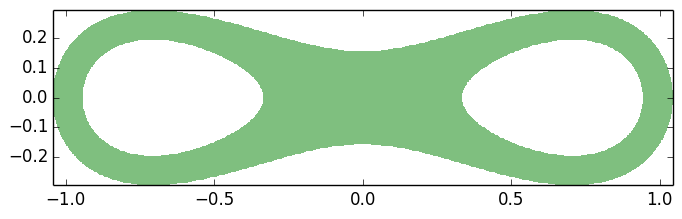

(-1.043701171875,1.0437011718749998,-0.29541015625,0.29541015625000006)

In [33]:
S6 = @separator x1^2 * (x1^2 - 1) + 4*x2^2 ∈ [-0.1, 0.1]  # 4th power not yet working correctly in powerRev
Y = IntervalBox(-10..10, -10..10)

@time inner, boundary = set_inversion(S6, Y, ldexp(1., -9))


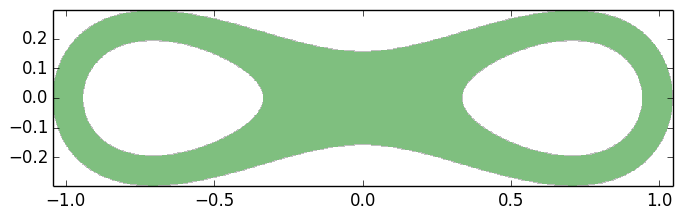

(-1.044921875,1.0449218749999998,-0.2978515625,0.29785156250000006)

In [34]:
draw(inner, boundary)